### Simple testing of cointegration of stocks

Here, we want to demonstrate the concept of cointegration between two series. We specifically use the concept of cointegration to see how two stock prices may be related over some time. The stocks that we will look at are AT&T and Verizon over some time period just as an example. 

In [26]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns 

from statsmodels.tsa.stattools import adfuller


In [2]:
tickers = ['T', 'VZ']
stock_data = yf.download(tickers = tickers, progress=False)

In [12]:
START_DATE = '2011-01-01'
TRAINING_END_DATE = '2018-01-01'
VALIDATION_END_DATE = '2020-01-01'

close_prices = stock_data.loc[START_DATE:, 'Close']

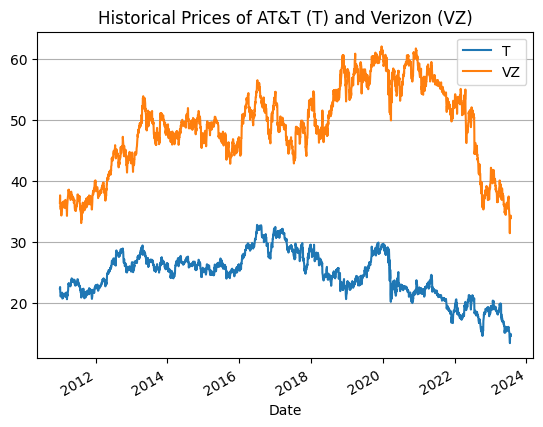

In [11]:
close_prices.plot()
plt.title("Historical Prices of AT&T (T) and Verizon (VZ)")
plt.grid(axis = 'y')
plt.show()

The concept of cointegration is that if you take two series that are integrated and regress them on each other, the residuals between them are stationary. This means that there is a common white noise process which governs them. 
The economic implication of this is that these stocks have some relationship between them on how valuable they are compared to each other. 

We will demonstrate the "Engle-Granger" method which does the following: 
* Perform linear regression of one price on the other 
* Compute the residual and run the ADF test on the residuals to test if this is stationary

In [41]:
training_data = close_prices.loc[:TRAINING_END_DATE]

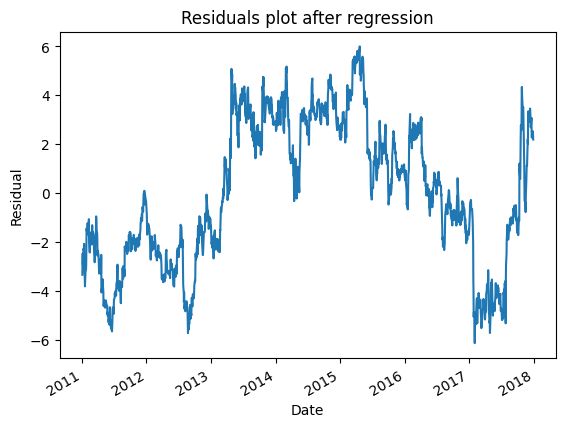

In [50]:
x = training_data.iloc[:, 0]
y = training_data.iloc[:, 1]

# performing linear regression and calculating the residuals
lin_reg = np.polyfit(x = x, y = y, deg = 1)

residuals = y - (x * lin_reg[0] + lin_reg[1])

residuals.plot()
plt.title("Residuals plot after regression")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.show()

In [44]:
adfuller_results = adfuller(residuals, maxlag = 1)

In [45]:
adfuller_results

(-2.5163443917567396,
 0.11154803466771296,
 1,
 1759,
 {'1%': -3.4340730634421153,
  '5%': -2.8631845252929495,
  '10%': -2.5676454956964605},
 1133.3719505618046)

From using the training data which goes from 2011 to 2018, we see that the adfuller results show results that we can't regard as stationary. If we look at the chart, it looks like it could be mean reverting but it seems that it may be too risky to try this. What happens when we run this on the whole dataset? 

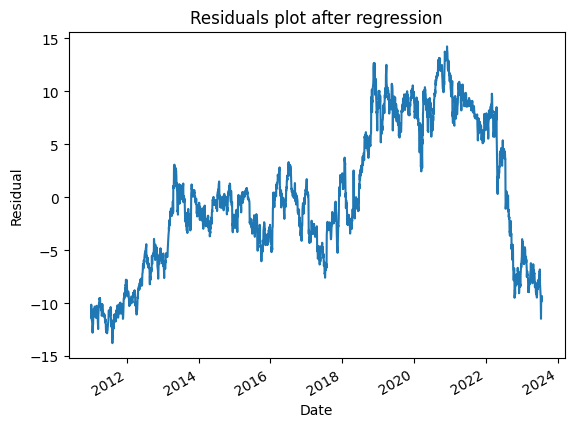

In [51]:
x = close_prices.iloc[:, 0]
y = close_prices.iloc[:, 1]

# performing linear regression and calculating the residuals
lin_reg = np.polyfit(x = x, y = y, deg = 1)

residuals = y - (x * lin_reg[0] + lin_reg[1])

residuals.plot()
plt.title("Residuals plot after regression")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.show()

In [52]:
adfuller_results = adfuller(residuals, maxlag = 1)
adfuller_results

(-2.075788100816247,
 0.25436110017091174,
 0,
 3161,
 {'1%': -3.432420426540509,
  '5%': -2.8624547875535526,
  '10%': -2.56725696255705},
 4138.419561736723)

### Trying another set of stocks to see how this looks 

We just showed how to do this for T and VZ. Let's try another set of stocks. I think that doing this with AAPL and MSFT might make some sense. They are both in Tech and seem to have similar valuation drivers. They are also competitors in certain areas. 

In [95]:
tech_stocks = ['AAPL', 'MSFT']

tech_stock_data = yf.download(tech_stocks, progress=False)

In [96]:
tech_stocks_close = tech_stock_data.dropna().Close

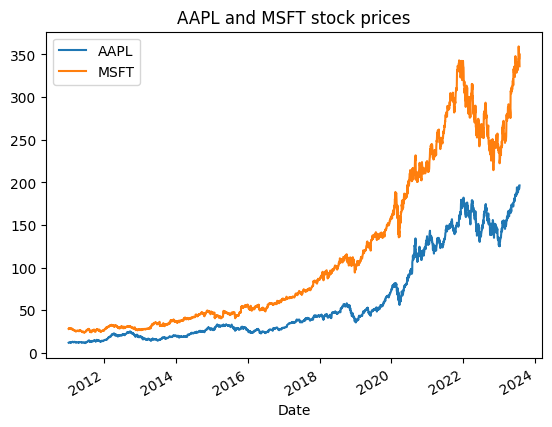

In [97]:
tech_stocks_close.loc[START_DATE:].plot()
plt.title("AAPL and MSFT stock prices")
plt.show()

In [98]:
training_tech_stock_data = tech_stocks_close.loc[START_DATE:TRAINING_END_DATE]

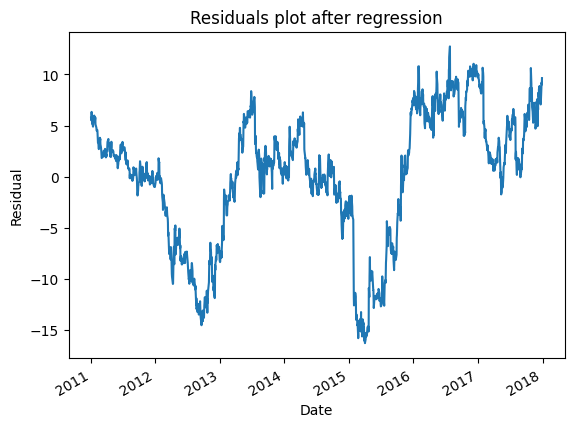

In [99]:
x = training_tech_stock_data.iloc[:, 0]
y = training_tech_stock_data.iloc[:, 1]

# performing linear regression and calculating the residuals
lin_reg = np.polyfit(x = x, y = y, deg = 1)

residuals = y - (x * lin_reg[0] + lin_reg[1])

residuals.plot()
plt.title("Residuals plot after regression")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.show()

In [100]:
adf_test = adfuller(residuals)
adf_test

(-2.168759608762761,
 0.21777861482189576,
 1,
 1759,
 {'1%': -3.4340730634421153,
  '5%': -2.8631845252929495,
  '10%': -2.5676454956964605},
 3631.949683246269)